In [12]:
fileadress='test/datas/cifdirs/testcif/ABW/ABW.cif_poscar.nnlist'

In [13]:
import re
from collections import defaultdict

In [127]:
def read_siteinfo_poscar(filepath):
    """
    Read siteinfo from a POSCAR file.
    """
    poscar = open(filepath).readlines()
    for i,text in enumerate(poscar):
        if ('direct' in text):
            break
        site_info = {i:re.findall(r'\w+',coords)[-1] for i,coords in enumerate(poscar[8:])}
    return site_info

In [128]:
import os 
import numpy as np
dirpath = 'test/datas/cifdirs/testcif/ABW'
siteinfo = read_siteinfo_poscar(os.path.join(dirpath,'ABW.cif_poscar'))
fileadress = os.path.join(dirpath,'ABW.cif_poscar.nnlist')

In [129]:
#make nn_data.pickle from file of nnlis
#set init info
f=open(fileadress,'r').readlines()
filename=re.split('/',fileadress)[-1]
resultfile='{}.pickle'.format(filename.replace('.nnlist',''))
resultadress=fileadress.replace(filename,'')
resultadress='{}{}'.format(resultadress,resultfile)

In [130]:
nnlist=defaultdict(list)
#read nnlist
for i in f:
    coord_info = i.replace('\n','').split(' ')
    coord_info = [coord_info_ for coord_info_ in coord_info if coord_info_ != '']
    coord_info = [int(coord_info_) if not re.search('\.',coord_info_) else float(coord_info_) for coord_info_ in coord_info]

    #サイト番号をchemenvと合わせる
    coord_info[0] -= 1
    coord_info[1] -= 1

    nnlist[coord_info[0]].append((coord_info[1:]))

In [131]:
nnlist[0]

[[0, 9.873, -9.873, 0.0, -0.0, -1, 0, 0],
 [0, 5.254, -0.0, -5.254, -0.0, 0, -1, 0],
 [0, 8.77, 0.0, 0.0, -8.77, 0, 0, -1],
 [0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0],
 [0, 8.77, 0.0, 0.0, 8.77, 0, 0, 1],
 [0, 5.254, 0.0, 5.254, 0.0, 0, 1, 0],
 [0, 9.873, 9.873, 0.0, 0.0, 1, 0, 0],
 [1, 7.106222, 4.9365, -2.627, 4.385, 0, -1, 0],
 [1, 7.106222, 4.9365, 2.627, 4.385, 0, 0, 0],
 [2, 6.10244, 3.104071, -5.254, -0.0, 0, -1, 0],
 [2, 9.303126, 3.104071, 0.0, -8.77, 0, 0, -1],
 [2, 3.104071, 3.104071, 0.0, 0.0, 0, 0, 0],
 [2, 9.303126, 3.104071, 0.0, 8.77, 0, 0, 1],
 [2, 6.10244, 3.104071, 5.254, 0.0, 0, 1, 0],
 [3, 5.430207, -1.832429, -2.627, 4.385, 0, -1, 0],
 [3, 5.430207, -1.832429, 2.627, 4.385, 0, 0, 0],
 [3, 9.203053, -1.832429, 7.881, 4.385, 0, 1, 0],
 [4, 4.423797, 3.104071, -2.627, 1.741722, 0, -1, 0],
 [4, 4.423797, 3.104071, 2.627, 1.741722, 0, 0, 0],
 [4, 8.647486, 3.104071, 7.881, 1.741722, 0, 1, 0],
 [5, 6.160295, -1.832429, -5.254, -2.643278, 0, -1, 0],
 [5, 3.21632, -1.832429, 0.0, 

In [145]:
nnlist = {key:sorted(coordinations,key=lambda x: x[1]) for key,coordinations in nnlist.items()}

In [155]:
distances = defaultdict(list)
for isite,atom in siteinfo.items():
    if atom == 'Si':
        max_range = 5
    elif atom == 'O':
        max_range = 3
    
    distance = [x[1] for x in nnlist[isite][1:max_range]]
    distances[atom]+=distance

In [160]:
from matplotlib import pyplot as plt

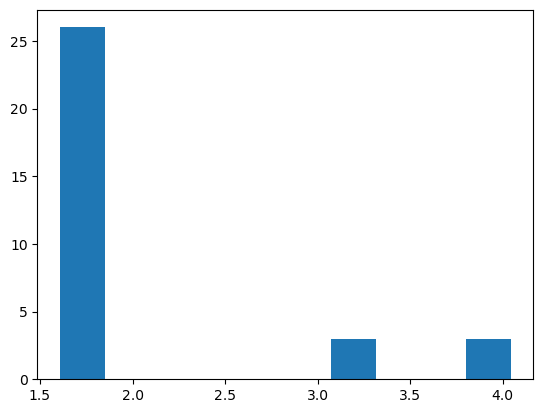

In [164]:
plt.hist(distances['Si'])
plt.show()

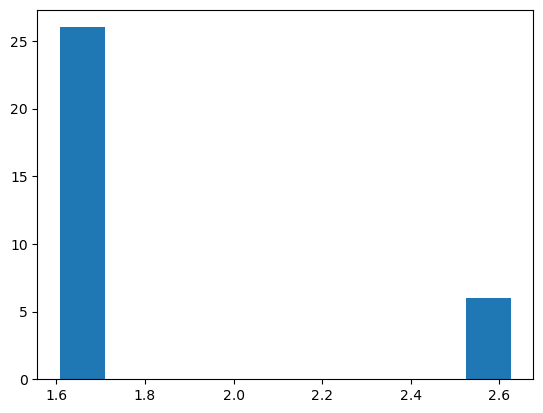

In [165]:
plt.hist(distances['O'])
plt.show()

In [ ]:
#set nn_data
nn_data=defaultdict(list)
center_info=[siteinfo[0],np.nan,0,0,0]
for i in nnlist.keys():
    nn_data[i].append(center_info)
    for isite,distace,coord,cell in nnlist[i]:
        nn_data_=[isite,siteinfo[isite-1],*coord]
        nn_data[i].append(nn_data_)
if os.path.isfile(resultadress):
    os.remove(resultadress)
with open(resultadress,'wb') as f:
    pickle.dump(nn_data,f)
return